# Finding Break-points

Here is my approach to detect the breakpoints in the time-series data of a stock using regression lines and basic mathematics. There are to major parameters to detect a certaion kind of breakpoint:
### Break-point Span :
This sets how much precentage a breakpoint covers relative to the entire data.
### Height :
This sets the required height for the eligible breakpoints relative to the standard deviation of data under consideration.

Note : You should scale the height and span of the data according to the data you considered in the get_pricing() method. This method is supported on Quantopian Lecture Series platform (https://www.quantopian.com/lectures) so that you dont need to hassle around for the data.

The Black markers highlight all the detected breakpoints, while the Green and Red markers highlights the maxima and minima out of them respectively

mean =  117.482435897 Std. Deviation =  0.483695125152
len =  390
maxima :  [128, 299]
minima :  [337, 35]


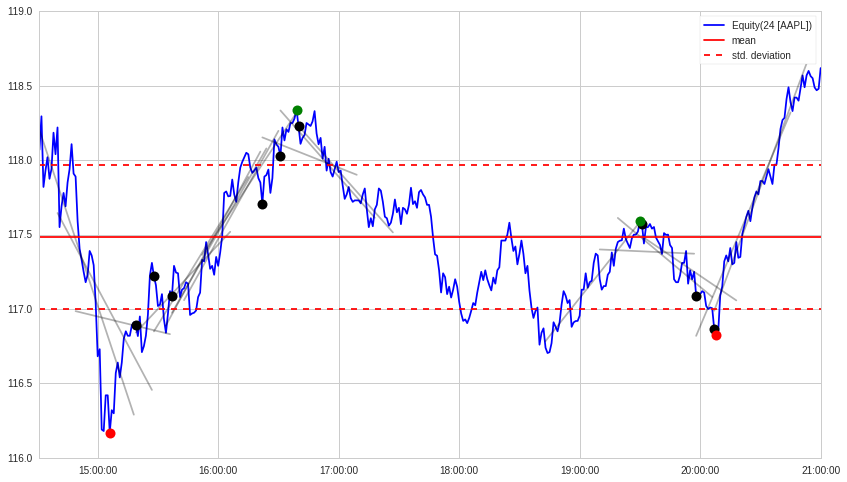

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


start = '2015-02-01'
end = '2015-02-02'
freq = 'minute'

bpSpan = 25   #how much percent should the breakpoint cover over the entire data
heightBP = 1.25     #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data

asset = get_pricing('AAPL', start_date=start, end_date=end, frequency=freq, fields='price')
l = len(asset)
step = int(l * bpSpan/200)
nums = np.arange(0,step)
dates = asset.index
plt.plot(asset, 'blue')
mean = np.mean(asset)
std = np.std(asset)
print 'mean = ', mean, 'Std. Deviation = ',std    
print 'len = ', l
breakPt = 'black'
Max = 'Green'
Min = 'Red'
i = 0
j = step
maxima = []
minima = []
while j+step < l :
    #print "i = ",i," ,j = ",j
    price_i = asset.values[i:i+step]
    slope_i, intercept_i, _ , _ , _  = linregress(nums, price_i)
    price_j = asset.values[j:j+step]
    slope_j, intercept_j, _ , _ , _  = linregress(nums, price_j)
    
    if(slope_i * slope_j < 0): #search for opposite slopes
        height_i = abs(slope_i*step)
        height_j = abs(slope_j*step)
        avgHeight = (height_i + height_j)/2
        if avgHeight > heightBP*std :  #check if avg. height is greater than the expexted peakness wrt std. deviation
            #print 'Found breakpoint at : ', dates[j]
            temp = i
            if(slope_i > 0):
                for k in np.arange(i,j+step):
                    if(asset.values[temp] < asset.values[k]):
                       temp = k
                maxima += [temp]
            else:
                for k in np.arange(i,j+step):
                    if(asset.values[temp] > asset.values[k]):
                       temp = k
                minima += [temp]
            
            x1_x2 = [dates[i], dates[i+step-1]]
            y1_y2 = [intercept_i, intercept_i + slope_i*step]
            plt.plot(x1_x2, y1_y2 , breakPt, alpha = 0.3 )
            x1_x2 = [dates[j], dates[j+step-1]]
            y1_y2 = [intercept_j, intercept_j + slope_j*step]
            plt.plot(x1_x2, y1_y2 , breakPt, alpha = 0.3 )
            
            x = dates[j]
            y = asset.values[j]
            plt.plot([x], [y], marker='o', markersize=10, color = breakPt)
                
    i += int(step*rolling_part)
    j = i+step

maxima = list(set(maxima))
minima = list(set(minima))
for x in maxima:
    plt.plot(dates[x], asset.values[x], marker='o', markersize=10, color = Max)
for x in minima:
    plt.plot(dates[x], asset.values[x],marker='o', markersize=10, color = Min)
print 'maxima : ',maxima
print 'minima : ',minima

plt.axhline(y=mean, color='r', linestyle='-', label = 'mean')
plt.axhline(y=mean+std, color='r', linestyle='--', label = 'std. deviation')
plt.axhline(y=mean-std, color='r', linestyle='--')
plt.legend()

mean =  117.482435897 Std. Deviation =  0.483695125152
len =  390
maxima :  [128, 299]
minima :  [337, 35, 213, 253]


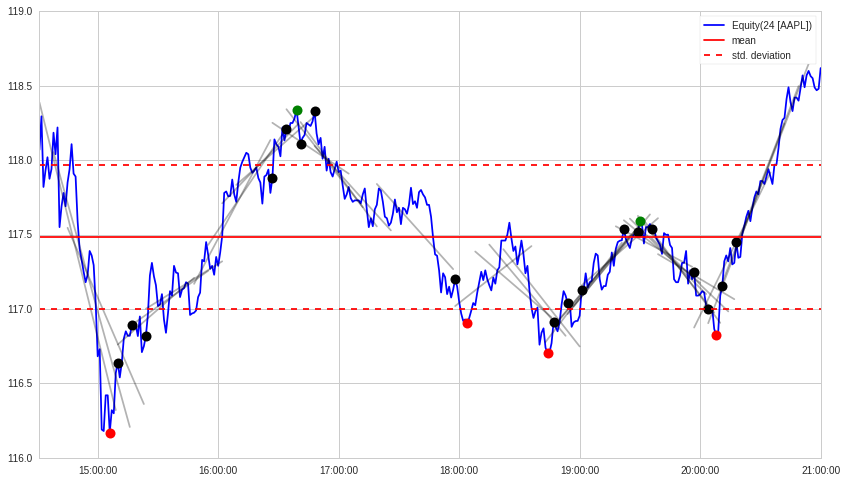

In [14]:

start = '2015-02-01'
end = '2015-02-02'
freq = 'minute'

bpSpan = 20  #how much percent should the breakpoint cover over the entire data
heightBP = 1   #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data


mean =  90.6984347826 Std. Deviation =  10.1550407496
len =  253
maxima :  [117, 197]
minima :  [141]


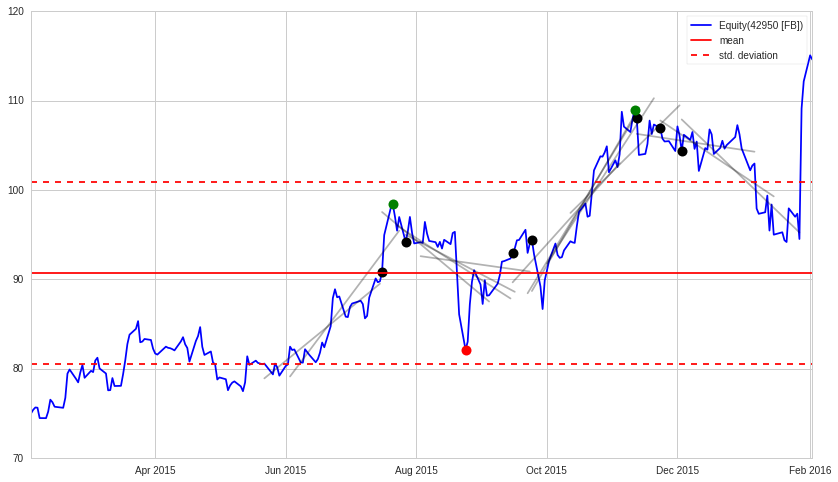

In [27]:
start = '2015-02-01'
end = '2016-02-02'
freq = 'daily'

bpSpan = 30   #how much percent should the breakpoint cover over the entire data
heightBP = 1     #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data


mean =  65.6427846154 Std. Deviation =  0.0933280938231
len =  390
maxima :  [336, 66, 247]
minima :  [164, 162, 131, 20]


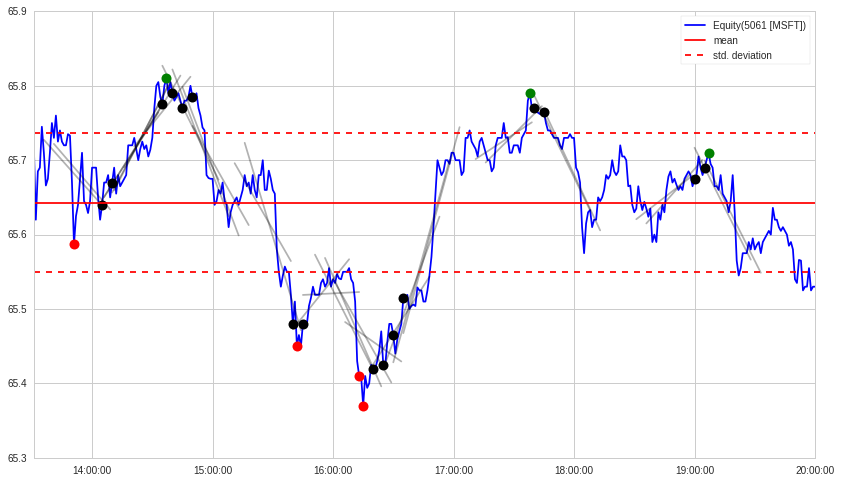

In [25]:

start = '2017-04-09'
end = '2017-04-10'
freq = 'minute'

bpSpan = 15   #how much percent should the breakpoint cover over the entire data
heightBP = 1     #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data


# Using Breakpoints for maximizing profit
The following code utilizes above logic to find the breakpoints and calculates maximum profit that can be earned playing around them.
The basic idea os to buy the stock at the minima and sell it at the maxima for maximum profit.

mean =  99.6424230769 Std. Deviation =  0.187810673847
len =  390
maxima :  [129, 230]
minima :  [36, 166, 280]
BUY @ time:  14:07 	price:  99.217
SELL @ time:  15:40 	price:  99.96
Profit per share =  0.743
BUY @ time:  16:17 	price:  99.55
SELL @ time:  17:21 	price:  99.965
Profit per share =  0.415
BUY @ time:  18:11 	price:  99.572
total profit =  1.158


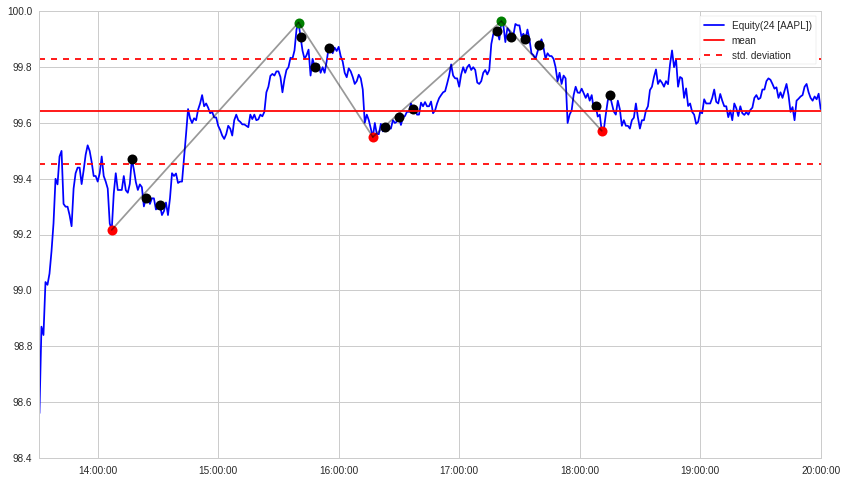

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


start = '2016-06-09'
end = '2016-06-09'
freq = 'minute'

bpSpan = 20   #how much percent should the breakpoint cover over the entire data
heightBP = 1     #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data

asset = get_pricing('AAPL', start_date=start, end_date=end, frequency=freq, fields='price')
l = len(asset)
step = int(l * bpSpan/200)
nums = np.arange(0,step)
dates = asset.index
plt.plot(asset, 'blue')
mean = np.mean(asset)
std = np.std(asset)
print 'mean = ', mean, 'Std. Deviation = ',std    
print 'len = ', l
breakPt = 'black'
Max = 'Green'
Min = 'Red'
i = 0
j = step
maxima = []
minima = []

while j+step < l :
    #print "i = ",i," ,j = ",j
    price_i = asset.values[i:i+step]
    slope_i, intercept_i, _ , _ , _  = linregress(nums, price_i)
    price_j = asset.values[j:j+step]
    slope_j, intercept_j, _ , _ , _  = linregress(nums, price_j)
    
    if(slope_i * slope_j < 0): #search for opposite slopes
        height_i = abs(slope_i*step)
        height_j = abs(slope_j*step)
        avgHeight = (height_i + height_j)/2
        if avgHeight > heightBP*std :  #check if avg. height is greater than the expexted peakness wrt std. deviation
            #print 'Found breakpoint at : ', dates[j]
            temp = i
            if(slope_i > 0):
                for k in np.arange(i,j+step):
                    if(asset.values[temp] < asset.values[k]):
                       temp = k
                maxima += [temp]
            else:
                for k in np.arange(i,j+step):
                    if(asset.values[temp] > asset.values[k]):
                       temp = k
                minima += [temp]            
            
            x = dates[j]
            y = asset.values[j]
            plt.plot([x], [y], marker='o', markersize=10, color = breakPt)
                
    i += int(step*rolling_part)
    j = i+step

maxima = list(set(maxima))
minima = list(set(minima))
for x in maxima:
    plt.plot(dates[x], asset.values[x], marker='o', markersize=10, color = Max)
for x in minima:
    plt.plot(dates[x], asset.values[x],marker='o', markersize=10, color = Min)
    
maxima.sort()
minima.sort()
print 'maxima : ',maxima
print 'minima : ',minima

curr = 0
if(maxima[0] < minima[0]):
    curr=1
profit=0
color = ['red', 'green']
prev = -1

while(len(maxima)>0 or len(minima)>0):
    x=0
    if curr==1:
        if(len(maxima)==1):
            point=maxima[0]
            maxima=[]
        else:
            for i in range(len(maxima)):
                #print 'length Max= ', len(maxima),'\ti=',i
                #print 'length Min= ', len(minima)
                if(maxima[i]<minima[0]):
                    x=i
            point = max(maxima[:x+1])
            maxima = maxima[x+1:]
        curr=0
        print 'SELL @ time: ',str(dates[point])[11:16], '\tprice: ',asset.values[point]
        p = asset.values[point] - asset.values[prev]
        print 'Profit per share = ',p
        profit += p
        
    else:
        if(len(minima)==1):
            point=minima[0]
            minima=[]
        else:
            for i in range(len(minima)) :
                #print 'length Min= ', len(minima),'\ti=',i
                #print 'length Max= ', len(maxima)
                if(minima[i]<maxima[0]):
                    x=i
            point = max(minima[:x+1])
            minima = minima[x+1:]
        curr=1
        print 'BUY @ time: ',str(dates[point])[11:16], '\tprice: ',asset.values[point]
        
    if(prev!=-1) :
        plt.plot([dates[prev],dates[point]], [asset.values[prev], asset.values[point]] , color = 'black', alpha=0.4)
        
    prev = point

print 'total profit = ',profit
    
plt.axhline(y=mean, color='r', linestyle='-', label = 'mean')
plt.axhline(y=mean+std, color='r', linestyle='--', label = 'std. deviation')
plt.axhline(y=mean-std, color='r', linestyle='--')
plt.legend()



mean =  45.7211666667 Std. Deviation =  0.0950298491119
len =  390
maxima :  [103, 210, 321]
minima :  [56, 147, 289]
BUY @ time:  14:27 	price:  45.47
SELL @ time:  15:14 	price:  45.77
Profit per share =  0.3
BUY @ time:  15:58 	price:  45.62
SELL @ time:  17:01 	price:  45.915
Profit per share =  0.295
BUY @ time:  18:20 	price:  45.72
SELL @ time:  18:52 	price:  45.903
Profit per share =  0.183
total profit =  0.778


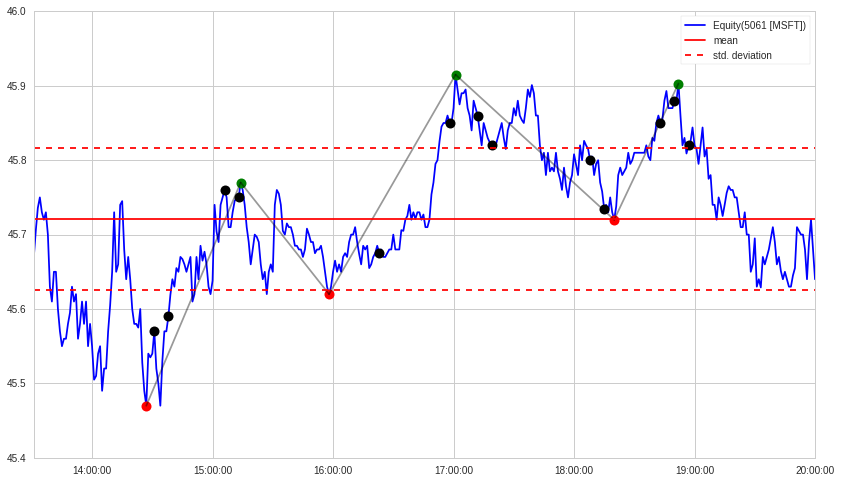

In [32]:
start = '2015-06-09'
end = '2015-06-09'
freq = 'minute'

bpSpan = 20   #how much percent should the breakpoint cover over the entire data
heightBP = 1     #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data


mean =  742.375063241 Std. Deviation =  146.27505126
len =  506
maxima :  [98, 292]
minima :  [126, 320]
SELL @ time:  00:00 	price:  693.97
Profit per share =  -262.57
BUY @ time:  00:00 	price:  482.06
SELL @ time:  00:00 	price:  844.36
Profit per share =  362.3
BUY @ time:  00:00 	price:  719.07
total profit =  99.73


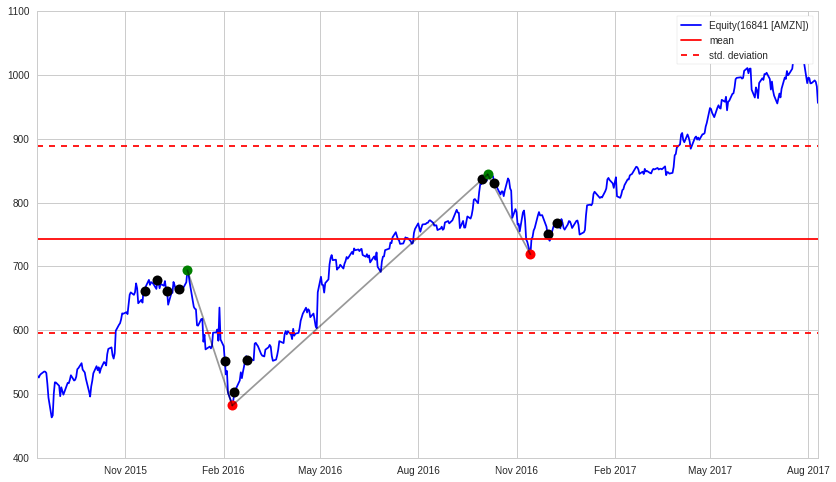

In [40]:
start = '2015-08-09'
end = '2017-08-10'
freq = 'daily'

bpSpan = 15   #how much percent should the breakpoint cover over the entire data
heightBP = 0.5    #Height of breakpoint wrt the std. deviation of the data
rolling_part = 0.2  #by what factor the regression line will roll or move to scan the data
